In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('../datasets/sleep_and_activity_dataset.csv')
df.head()

,Unnamed: 0,Person ID,Date,Sleep Duration (hrs),Sleep Efficiency (%),Bed Time,Wake Up Time,Deep Sleep (hrs),Light Sleep (hrs),REM Sleep (hrs),Step Count,Distance Walked/Run (km),Calories Burned,Exercise Duration (min),Calculated Duration,Duration Match,Time unable to sleep/Others (hrs),Age,Gender
0,0,Person_1,2025-05-29,6.763567,76.10,2025-05-31 23:06:00,2025-06-01 05:51:48.842830288,0.970121,2.700219,1.495712,12216,9.31,1996,18.81,5.71,False,1.597515,56,Male
1,1,Person_2,2025-05-29,7.101986,78.30,2025-05-31 21:41:00,2025-06-01 04:47:07.148024820,0.962702,3.172448,1.634347,7775,5.92,2336,56.51,8.87,False,1.332489,46,Female
2,2,Person_3,2025-05-29,6.726011,75.96,2025-05-31 23:40:00,2025-06-01 06:23:33.640384918,0.885353,2.813898,1.665220,5185,3.95,2232,69.51,6.87,False,1.361541,32,Male
3,3,Person_4,2025-05-29,7.179961,78.98,2025-05-31 21:34:00,2025-06-01 04:44:47.859080926,1.045949,2.985220,1.672419,3879,2.96,2508,26.58,6.27,False,1.476373,60,Female
4,4,Person_5,2025-05-29,6.877313,76.99,2025-05-31 22:55:00,2025-06-01 05:47:38.327794910,1.320055,2.794770,1.558585,4381,3.34,2104,71.28,6.64,False,1.203904,25,Male


In [9]:
df['Bed Time'] = pd.to_datetime(df['Bed Time'])
df['Wake Up Time'] = pd.to_datetime(df['Wake Up Time'])
df['Bed_time_hours'] = df['Bed Time'].dt.hour
df['Wakeup_time_hours'] = df['Wake Up Time'].dt.hour
df.head()

,Unnamed: 0,Person ID,Date,Sleep Duration (hrs),Sleep Efficiency (%),Bed Time,Wake Up Time,Deep Sleep (hrs),Light Sleep (hrs),REM Sleep (hrs),...,Distance Walked/Run (km),Calories Burned,Exercise Duration (min),Calculated Duration,Duration Match,Time unable to sleep/Others (hrs),Age,Gender,Bed_time_hours,Wakeup_time_hours
0,0,Person_1,2025-05-29,6.763567,76.10,2025-05-31 23:06:00,2025-06-01 05:51:48.842830288,0.970121,2.700219,1.495712,...,9.31,1996,18.81,5.71,False,1.597515,56,Male,23,5
1,1,Person_2,2025-05-29,7.101986,78.30,2025-05-31 21:41:00,2025-06-01 04:47:07.148024820,0.962702,3.172448,1.634347,...,5.92,2336,56.51,8.87,False,1.332489,46,Female,21,4
2,2,Person_3,2025-05-29,6.726011,75.96,2025-05-31 23:40:00,2025-06-01 06:23:33.640384918,0.885353,2.813898,1.665220,...,3.95,2232,69.51,6.87,False,1.361541,32,Male,23,6
3,3,Person_4,2025-05-29,7.179961,78.98,2025-05-31 21:34:00,2025-06-01 04:44:47.859080926,1.045949,2.985220,1.672419,...,2.96,2508,26.58,6.27,False,1.476373,60,Female,21,4
4,4,Person_5,2025-05-29,6.877313,76.99,2025-05-31 22:55:00,2025-06-01 05:47:38.327794910,1.320055,2.794770,1.558585,...,3.34,2104,71.28,6.64,False,1.203904,25,Male,22,5


In [10]:
df.columns

Index(['Unnamed: 0', 'Person ID', 'Date', 'Sleep Duration (hrs)',
       'Sleep Efficiency (%)', 'Bed Time', 'Wake Up Time', 'Deep Sleep (hrs)',
       'Light Sleep (hrs)', 'REM Sleep (hrs)', 'Step Count',
       'Distance Walked/Run (km)', 'Calories Burned',
       'Exercise Duration (min)', 'Calculated Duration', 'Duration Match',
       'Time unable to sleep/Others (hrs)', 'Age', 'Gender', 'Bed_time_hours',
       'Wakeup_time_hours'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Unnamed: 0                         300 non-null    int64         
 1   Person ID                          300 non-null    object        
 2   Date                               300 non-null    object        
 3   Sleep Duration (hrs)               300 non-null    float64       
 4   Sleep Efficiency (%)               300 non-null    float64       
 5   Bed Time                           300 non-null    datetime64[ns]
 6   Wake Up Time                       300 non-null    datetime64[ns]
 7   Deep Sleep (hrs)                   300 non-null    float64       
 8   Light Sleep (hrs)                  300 non-null    float64       
 9   REM Sleep (hrs)                    300 non-null    float64       
 10  Step Count                         300

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [13]:
df.head()

,Unnamed: 0,Person ID,Date,Sleep Duration (hrs),Sleep Efficiency (%),Bed Time,Wake Up Time,Deep Sleep (hrs),Light Sleep (hrs),REM Sleep (hrs),...,Distance Walked/Run (km),Calories Burned,Exercise Duration (min),Calculated Duration,Duration Match,Time unable to sleep/Others (hrs),Age,Gender,Bed_time_hours,Wakeup_time_hours
0,0,Person_1,2025-05-29,6.763567,76.10,2025-05-31 23:06:00,2025-06-01 05:51:48.842830288,0.970121,2.700219,1.495712,...,9.31,1996,18.81,5.71,False,1.597515,56,1,23,5
1,1,Person_2,2025-05-29,7.101986,78.30,2025-05-31 21:41:00,2025-06-01 04:47:07.148024820,0.962702,3.172448,1.634347,...,5.92,2336,56.51,8.87,False,1.332489,46,0,21,4
2,2,Person_3,2025-05-29,6.726011,75.96,2025-05-31 23:40:00,2025-06-01 06:23:33.640384918,0.885353,2.813898,1.665220,...,3.95,2232,69.51,6.87,False,1.361541,32,1,23,6
3,3,Person_4,2025-05-29,7.179961,78.98,2025-05-31 21:34:00,2025-06-01 04:44:47.859080926,1.045949,2.985220,1.672419,...,2.96,2508,26.58,6.27,False,1.476373,60,0,21,4
4,4,Person_5,2025-05-29,6.877313,76.99,2025-05-31 22:55:00,2025-06-01 05:47:38.327794910,1.320055,2.794770,1.558585,...,3.34,2104,71.28,6.64,False,1.203904,25,1,22,5


In [14]:
df.drop(['Unnamed: 0','Person ID','Date','Bed Time','Wake Up Time','Step Count','Distance Walked/Run (km)', 'Calories Burned','Exercise Duration (min)', 'Calculated Duration', 'Duration Match'],axis=1,inplace=True)

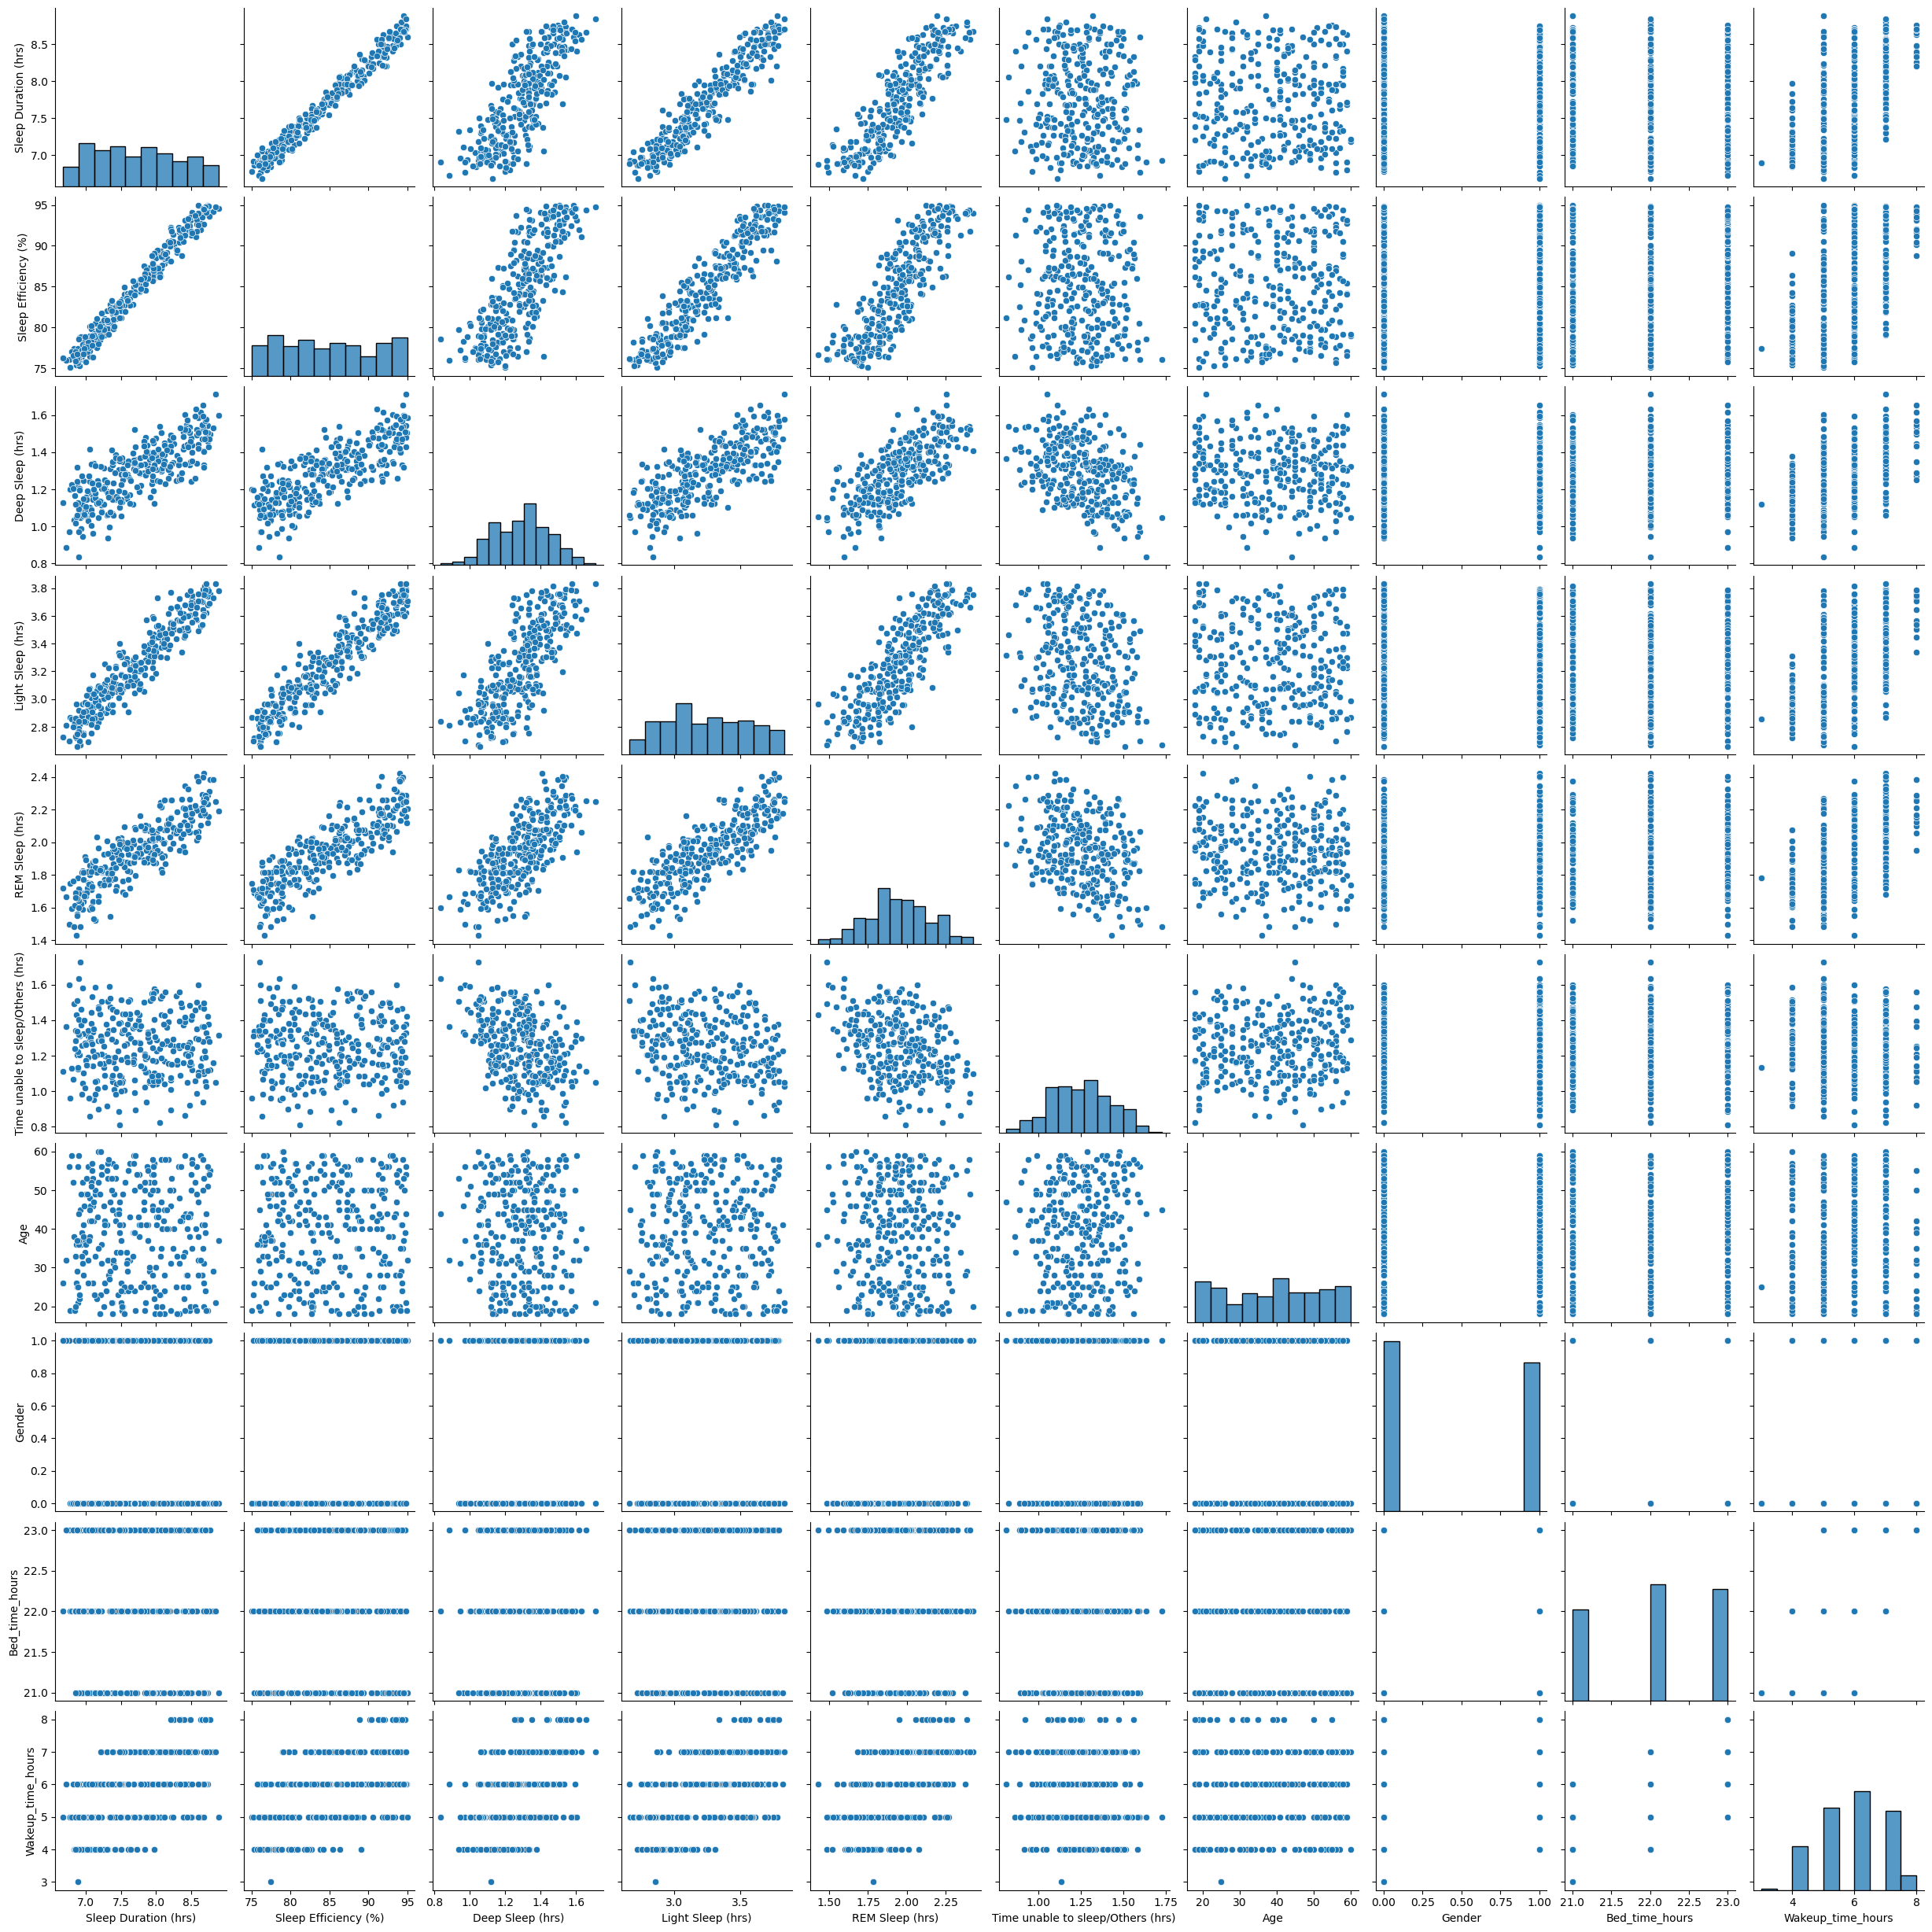

In [15]:
sns.pairplot(df)

In [16]:
x = df[['Sleep Duration (hrs)', 'Deep Sleep (hrs)', 'Light Sleep (hrs)', 'REM Sleep (hrs)', 'Time unable to sleep/Others (hrs)', 'Age', 'Gender', 'Bed_time_hours', 'Wakeup_time_hours']]
y = df['Sleep Efficiency (%)']

<Axes: >

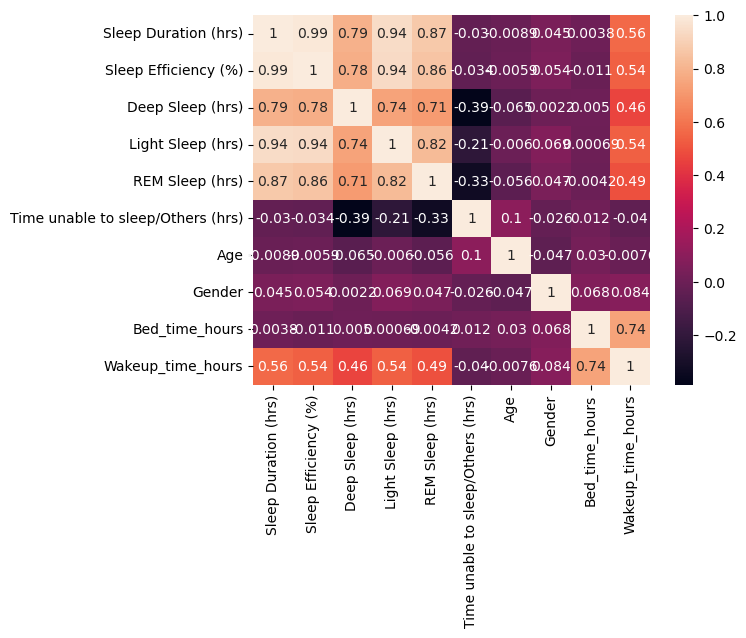

In [17]:
sns.heatmap(df.corr(), annot=True)

In [22]:
def feature_selection(threshold):
    corr_matrix = df.corr()
    corr_set = set()
    for i in range(len(df.columns)):
        for j in range(i):
            if (abs(corr_matrix.iloc[i][j]) > threshold):
                corr_set.add(corr_matrix.columns[i])
    return corr_set

excess = feature_selection(0.85)
if 'Sleep Efficiency (%)' in excess:
    excess.remove('Sleep Efficiency (%)')

C:\Users\agary\AppData\Local\Temp\ipykernel_3396\1270533596.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (abs(corr_matrix.iloc[i][j]) > threshold):


In [23]:
df.drop(excess,axis=1,inplace=True)

In [25]:
df.to_csv('../datasets/sleep_cleaned.csv')